In [ ]:
Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.
----------
Key features of wine data set are:
    Input features:
        1 - fixed acidity - it is directly or positively corelated in predicting the output feature (quality)
        2 - volatile acidity - it is directly or positively corelated in predicting the output feature (quality)
        3 - citric acid - it is directly or positively corelated in predicting the output feature (quality)
        4 - residual sugar - it is directly or positively corelated in predicting the output feature (quality)
        5 - chlorides - it is directly or positively corelated in predicting the output feature (quality)
        6 - free sulfur dioxide - it is indirectly or negatively corelated in predicting the output feature (quality)
        7 - total sulfur dioxide - - it is indirectly or negatively corelated in predicting the output feature (quality)
        8 - density - it is directly or positively corelated in predicting the output feature (quality)
        9 - pH - it is directly or positively corelated in predicting the output feature (quality)
        10 - sulphates - it is indirectly or negatively corelated in predicting the output feature (quality)
        11 - alcohol - it is indirectly or negatively corelated in predicting the output feature (quality)
    Output feature:
        1 - Quality


In [1]:
''' Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.
------- ''' 
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.isnull().sum()

-- There is no missing data in wine data set.

Various imputation techniques are:
    
1. Complete Case Analysis(CCA)
    Advantages:
        1. Easy to implement
        2. No Data Manipulation required
    Disadvantages:
        1. Deleted data can be informative
        2. Can lead to the deletion of large part of the data
        3. Can create a bias in the dataset, if a large amount of particular type of variable is deleted from it
        4. The production model will not know what to do with missing data
        
2. Arbitrary Value Imputation
    Advantages:
        1. Easy to implement
        2. We can use it in production
        3. It retains the importance of “missing values” if it exists
    Disadvantages:
        1.Can distort original variable distribution
        2. Arbitrary values can create outliers
        3. Extra caution required in selecting the Arbitrary value
        
3. Frequent Category Imputation
    Advantages:
        1.Implementation is easy
        2. We can obtain a complete dataset in very little time
        3. We can use this technique in the production model
    Disadvantages:
        1. The higher the percentage of missing values, the higher will be the distortion
        2. May lead to over-representation of a particular category
        3. Can distort original variable distribution

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/tmp/ipykernel_132/1404209713.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


<AxesSubplot: xlabel='Average', ylabel='Count'>

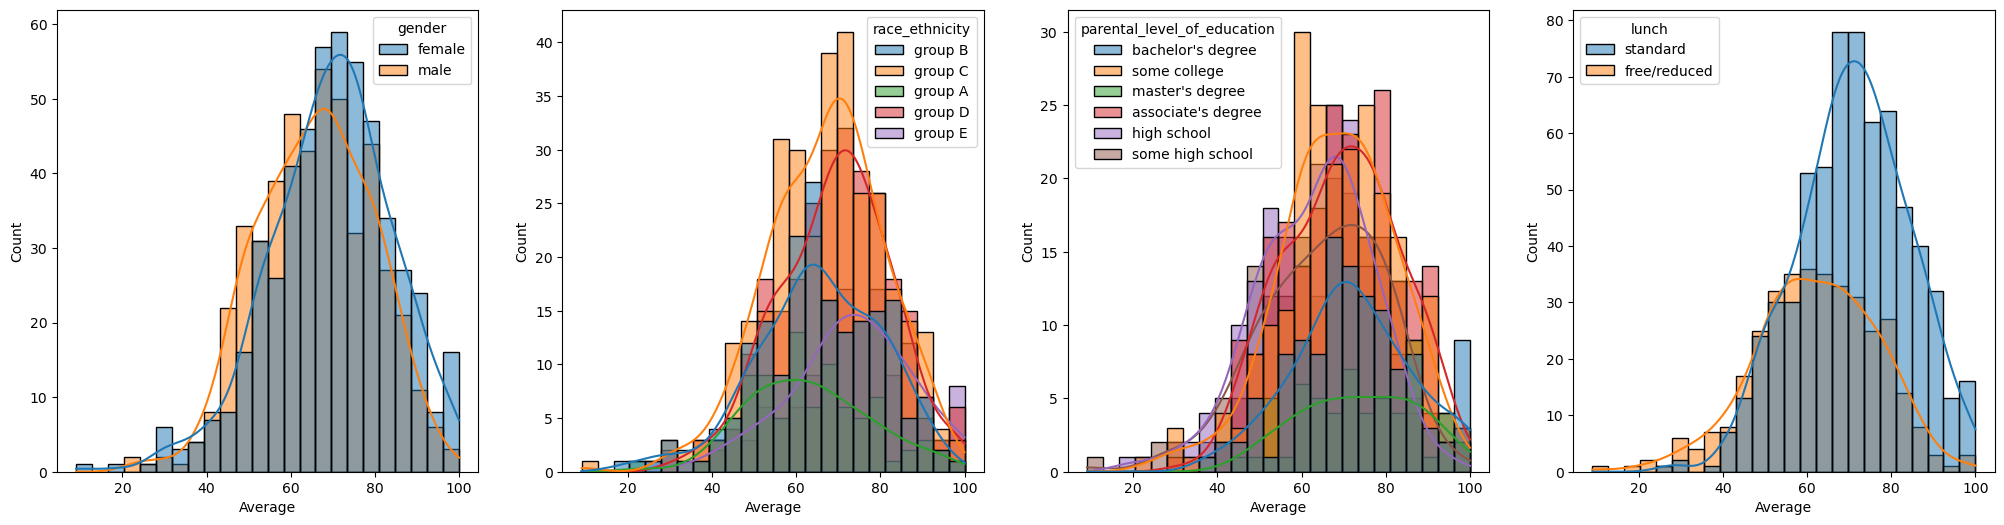

In [12]:
'''Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?
----- '''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('stud.csv')
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['Average']=df['total_score']/3
df.head()

plt.subplots(1,1,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.subplot(142)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(144)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')


Observation: 
    gender - female is performing better than male students
    race_ethnicity - Gooup A and Group B is performing poorly
    parental_level_of_education - this has not much impact on student's performance
    lunch - standard lunch helps student to perform well in exam

['math_score', 'reading_score', 'writing_score', 'total_score', 'Average']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


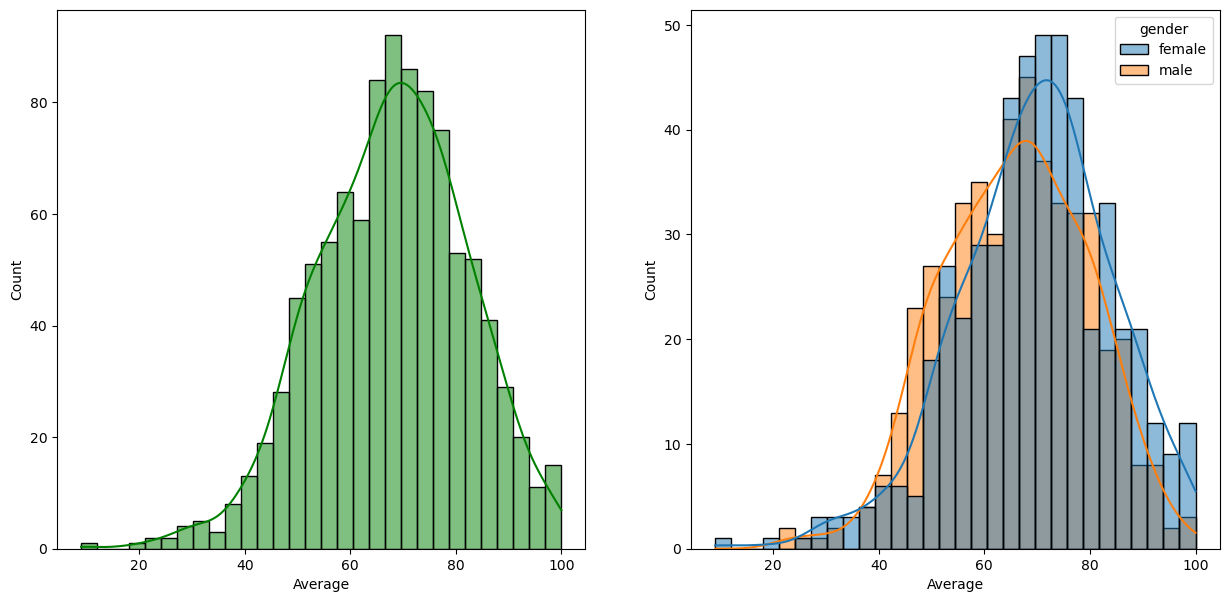

In [18]:
'''Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?
------

Applying feature engineering techniques during exploratory data analysis (EDA) to uncover hidden patterns, 
identify relationships between features, and understand the data distribution. 
This helps in selecting relevant features and building better models.'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('stud.csv')
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['Average']=df['total_score']/3
df.head()

## gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score

## check missing values
df.isnull().sum()
## Observation : there are no missing values

df.isna().sum()

## Check duplicates
df.duplicated().sum()
## there are no duplicates

## Checking the number of uniques values of each columns
df.nunique()

## check the statistics of the data set
df.describe()

## Observation: 
## all means are close to each other, between 66 and 69
## all std are also close , between 14.6 to 15.19
## while there is a minimum of 0 for maths, other are having 17 and 10 value

## segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(numerical_features)
print(categorical_feature)

## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['Average']=df['total_score']/3

## Explore Visualisation
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')
plt.show()

## observations: Female student sperformed well in compared to male students



In [ ]:
'''Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?'''

import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()
df.isnull().sum()
## there is no missing data

## Duplicate records
df[df.duplicated()]

## remove the duplicate
df.drop_duplicates(inplace=True)

df.shape

print(df.columns)

## unique output
print(df['quality'].unique())

df.isnull().sum()
## No null values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

print(numerical_features)
print(categorical_feature)

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='quality',kde=True,hue='fixed acidity')
plt.subplot(142)
sns.histplot(data=df,x='quality',kde=True,hue='volatile acidity')
plt.subplot(143)
sns.histplot(data=df,x='quality',kde=True,hue='citric acid')
plt.subplot(144)
sns.histplot(data=df,x='quality',kde=True,hue='residual sugar')

plt.subplot(146)
sns.histplot(data=df,x='quality',kde=True,hue='free sulfur dioxide')
plt.subplot(147)
sns.histplot(data=df,x='quality',kde=True,hue='total sulfur dioxide')
plt.subplot(148)
sns.histplot(data=df,x='quality',kde=True,hue='density')
plt.subplot(149)
sns.histplot(data=df,x='quality',kde=True,hue='pH')
plt.subplot(150)
sns.histplot(data=df,x='quality',kde=True,hue='sulphates')
plt.subplot(151)
sns.histplot(data=df,x='quality',kde=True,hue='alcohol')
plt.show()



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[5 6 7 4 8 3]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[]


/tmp/ipykernel_84/3030282711.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_84/3030282711.py:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)


<AxesSubplot: >

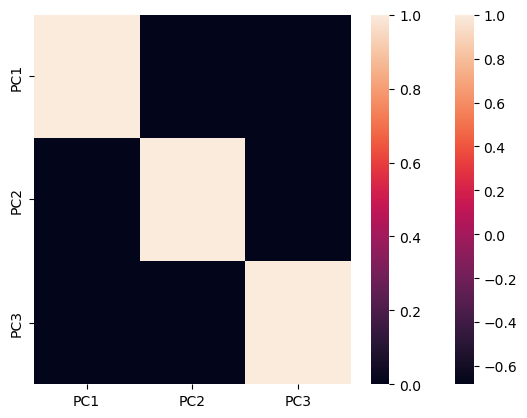

In [5]:
'''Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?
------'''

import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns

df=pd.read_csv('winequality-red.csv')
df.head()
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

sns.heatmap(scaled_data.corr())

pca = PCA(n_components = 3) #Taking no. of Principal Components as 3
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

## checking correlation after PCA

sns.heatmap(data_pca.corr())